In [168]:
import numpy as np
import math

import matplotlib.pyplot as plt

from scipy.stats import linregress

For given amplitude $a$, we run the code and get the amplified probability

If we let the true amplitude be $\alpha$, the program conduct exact amplitude amplification as if true amplitude is $a$ ($a \neq \alpha$)

it gives us an amplified probability that is not 1.

Therefore, we can plot the graph of true amplitude vs amplified probability for given a value.

We can find $\alpha$ that gives the amplified probability from the code by newton's method. (We solve it numerically)

Note that it gives two values for each $a$ due to the shape of the function.

So for testing two different $a$ while other conditions fixed (sigma and range) we can estimate the true value of amplitude

The estimated value of $a$ shows linear relation with the calculated amplitude according to the paper.

So we do linear fitting and figured out multiplying 1.444 for the calculated value gives the adequate amplitude.

In [169]:
def find_k(a):
    k=math.ceil(np.pi/(4*np.arcsin(a)) -0.5)

    return k

def find_mismatch(a,alpha):
    k = find_k(a)
    theta=np.pi/(4*k+2)
    varphi=np.arcsin(alpha*np.sin(theta)/a)

    amplitude=np.sin((2*k+1)*varphi)

    return amplitude

In [170]:
# Step 2: Parameters
a = 0.75
X = np.sqrt(0.73497)  # target mismatch value

In [171]:
# Function for P(x) and its derivative, denoted as f(x) and df(x) respectively

# function for computing P(x)
def f(x):
    return find_mismatch(a,x)-X

# function for computing P'(x). Since required precision is 1e-10, I used h=1e-12, which is smaller then the given precision.
def df(x):
    h=1e-6
    return (f(x+h)-f(x-h))/(2*h)

In [172]:
# Newton's method
def newtonMethod(x):
    dx=f(x)/df(x)
    return x-dx


# Newtons' method solution starting from x0, with precision denoted as error
def findSol(x0,error):
    indicator=True

    while(indicator):
        x=newtonMethod(x0)
        condition1=abs(f(x)<error)
        condition2=abs(x-x0)<error

        x0=x
        indicator =not (condition1 and condition2)


    return x0


# Finding the roots by Newton's method for the given list of inital points. (Initial guess for the roots)
def roots_of_f(x0_List,error):
    roots=[]
    for i in range(len(x0_List)):
        solution=findSol(x0_List[i],error)
        roots.append(solution)

    return roots

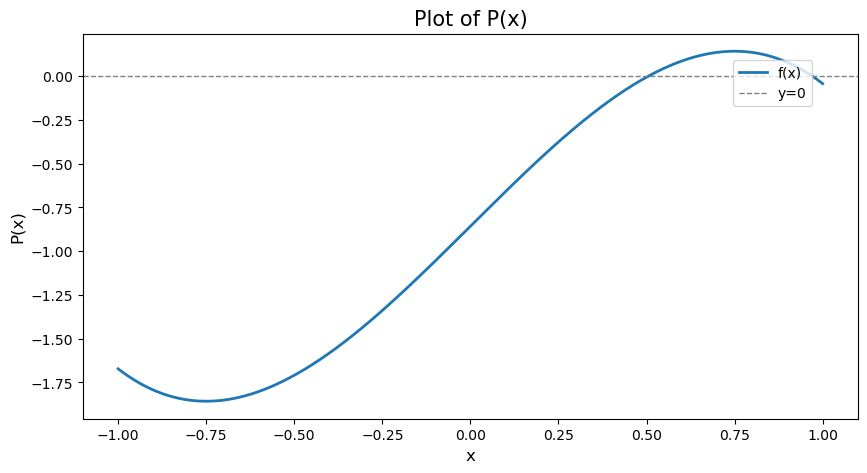

In [173]:
# 1-1) Plotting the P(x)

# The plot shows that the good guess for the roots are

# 0.04, 0.15, 0.37, 0.61, 0.83, 0.95

# Create x values from 0 to 1
x = np.linspace(-1, 1, 1000)
y = f(x)

# Plot f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x)', linewidth=2)

# Add horizontal line at y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='y=0')

# Labels and title
plt.title('Plot of P(x)', fontsize=15)
plt.xlabel('x',fontsize=12)
plt.ylabel('P(x)',fontsize=12)
#plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Show the plot
plt.show()

In [174]:
# 1-2) Finding the roots of P(x)=0 for x=0 to x=1. The initial guessing points are from 1-1)


x_i=[0.0,0.9]
error=1e-10

roots=np.array(roots_of_f(x_i,error))
print("Roots from Newton's Method")
print(roots)
print()
print("Function values for calcualted roots.")
print("They are very close to 0.")
print(f(roots))

Roots from Newton's Method
[0.50494613 0.97074893]

Function values for calcualted roots.
They are very close to 0.
[ 0.00000000e+00 -1.11022302e-16]


Followings are the data for estimated/calculated value of amplitude for varying range with $\text{EXP}\_\text{RATE} = 1 $

Linear Regression shows good fitting ($R^2 >0.99$)

If we allow intercept, we get slope of $1.428$

If we don't we get $1.444$

In [175]:
# Step 1: Input data
calculated = np.array([0.2798699195, 0.3227396325, 0.3394745017, 0.3280870938, 0.2991333939])
estimated = np.array([0.4036581867, 0.46719464, 0.48612144, 0.4767588633, 0.43207591])

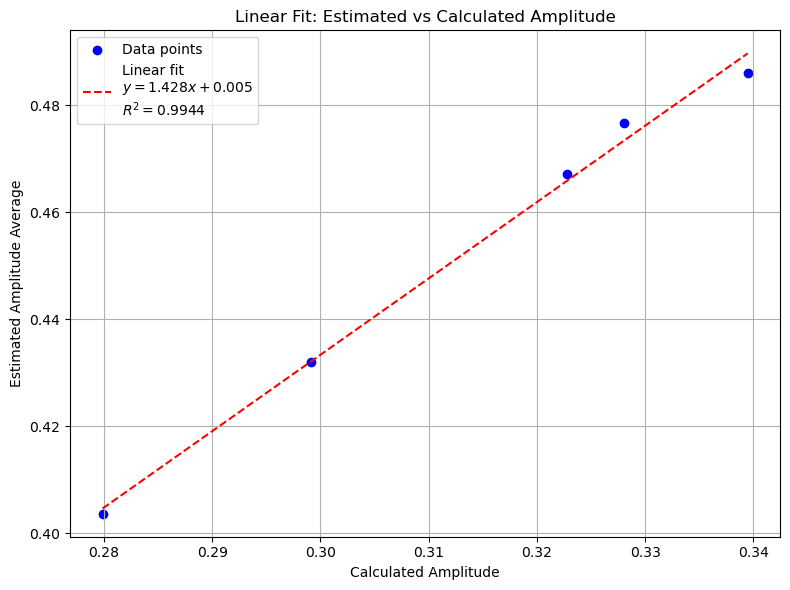

In [176]:
# Step 2: Linear regression
slope, intercept, r_value, p_value, std_err = linregress(calculated, estimated)
line_x = np.linspace(min(calculated), max(calculated), 100)
line_y = slope * line_x + intercept

# Step 3: Plot
plt.figure(figsize=(8,6))
plt.scatter(calculated, estimated, color='blue', label='Data points')
plt.plot(line_x, line_y, color='red', linestyle='--', label=f'Linear fit\n$y={slope:.3f}x + {intercept:.3f}$\n$R^2={r_value**2:.4f}$')
plt.xlabel('Calculated Amplitude')
plt.ylabel('Estimated Amplitude Average')
plt.title('Linear Fit: Estimated vs Calculated Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [177]:
def r_squared_given_slope(x, y, fixed_slope):
    """
    Calculates R^2 for the best-fit line y = fixed_slope * x + intercept,
    where the slope is fixed and intercept is optimized.
    """
    # Step 1: Compute optimal intercept for fixed slope
    intercept = np.mean(y - fixed_slope * x)

    # Step 2: Predict y using this line
    y_pred = fixed_slope * x + intercept

    # Step 3: Compute R^2
    ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared, intercept

# Example: Evaluate R^2 for a fixed slope (e.g., 1.3)
fixed_slope = np.sqrt(2)
r2, optimal_intercept = r_squared_given_slope(calculated, estimated, fixed_slope)

print(f"Fixed slope: {fixed_slope}")
print(f"Optimal intercept: {optimal_intercept:.6f}")
print(f"R^2 value: {r2:.6f}")


Fixed slope: 1.4142135623730951
Optimal intercept: 0.009295
R^2 value: 0.994288


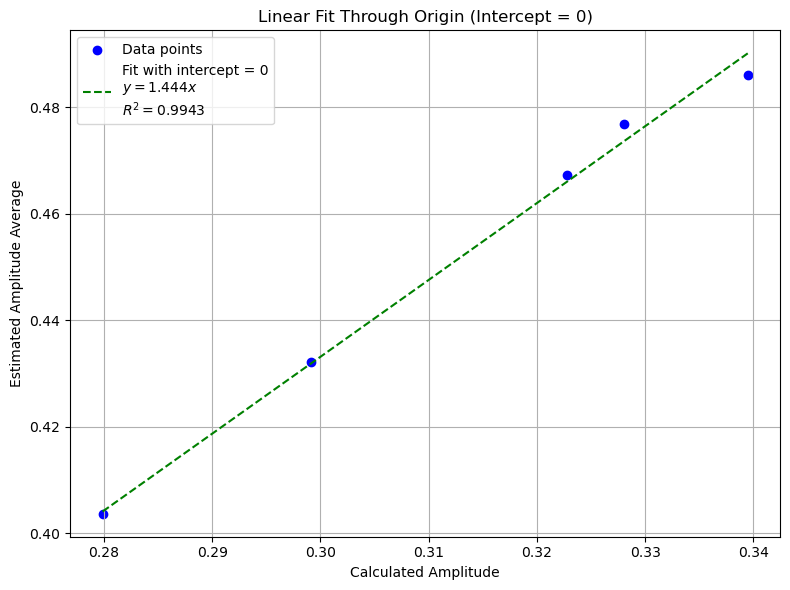

In [178]:
# Step 1: Input data
calculated = np.array([0.2798699195, 0.3227396325, 0.3394745017, 0.3280870938, 0.2991333939])
estimated = np.array([0.4036581867, 0.46719464, 0.48612144, 0.4767588633, 0.43207591])

# Step 2: Linear regression with intercept = 0
slope_0 = np.sum(calculated * estimated) / np.sum(calculated ** 2)
y_pred_0 = slope_0 * calculated
ss_res_0 = np.sum((estimated - y_pred_0) ** 2)
ss_tot = np.sum((estimated - np.mean(estimated)) ** 2)
r2_0 = 1 - ss_res_0 / ss_tot

# Step 3: Plot
line_x = np.linspace(min(calculated), max(calculated), 100)
line_y = slope_0 * line_x

plt.figure(figsize=(8,6))
plt.scatter(calculated, estimated, color='blue', label='Data points')
plt.plot(line_x, line_y, color='green', linestyle='--',
         label=f'Fit with intercept = 0\n$y = {slope_0:.3f}x$\n$R^2 = {r2_0:.4f}$')
plt.xlabel('Calculated Amplitude')
plt.ylabel('Estimated Amplitude Average')
plt.title('Linear Fit Through Origin (Intercept = 0)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [179]:
def r_squared_fixed_slope_intercept_zero(x, y, fixed_slope):
    """
    Calculates R^2 for the line y = fixed_slope * x,
    where slope is fixed and intercept is 0.
    """
    # Step 1: Predict y using fixed slope and intercept = 0
    y_pred = fixed_slope * x

    # Step 2: Compute R^2
    ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared


fixed_slope = np.sqrt(2)  # Example slope

r2 = r_squared_fixed_slope_intercept_zero(calculated, estimated, fixed_slope)
print(f"R² for slope = {fixed_slope}, intercept = 0: {r2:.6f}")

R² for slope = 1.4142135623730951, intercept = 0: 0.903053
